# Importing necessary libraries

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor
from category_encoders import TargetEncoder

# Read and explore the data

In [8]:
df = pd.read_csv("data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


## date would not have any correlation with the target

In [9]:
df = df.drop("date", axis=1 )
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [10]:
df.shape

(4600, 17)

In [11]:
df["country"].value_counts()

USA    4600
Name: country, dtype: int64

## Country does not have useful data

In [12]:
df = df.drop("country", axis=1 )
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


In [13]:
len(df["street"].unique())

4525

In [14]:
df = df.drop("street", axis=1 )
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052


In [15]:
categorical_features = ["city", "statezip"]
continous_features = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "waterfront", "view", "condition", "sqft_above", "sqft_basement", "yr_built", "yr_renovated"]
continous_features_array = np.array(continous_features)
continous_features_array = continous_features_array.reshape((4,3))
print(continous_features_array)

[['bedrooms' 'bathrooms' 'sqft_living']
 ['sqft_lot' 'floors' 'waterfront']
 ['view' 'condition' 'sqft_above']
 ['sqft_basement' 'yr_built' 'yr_renovated']]


# Data visualization

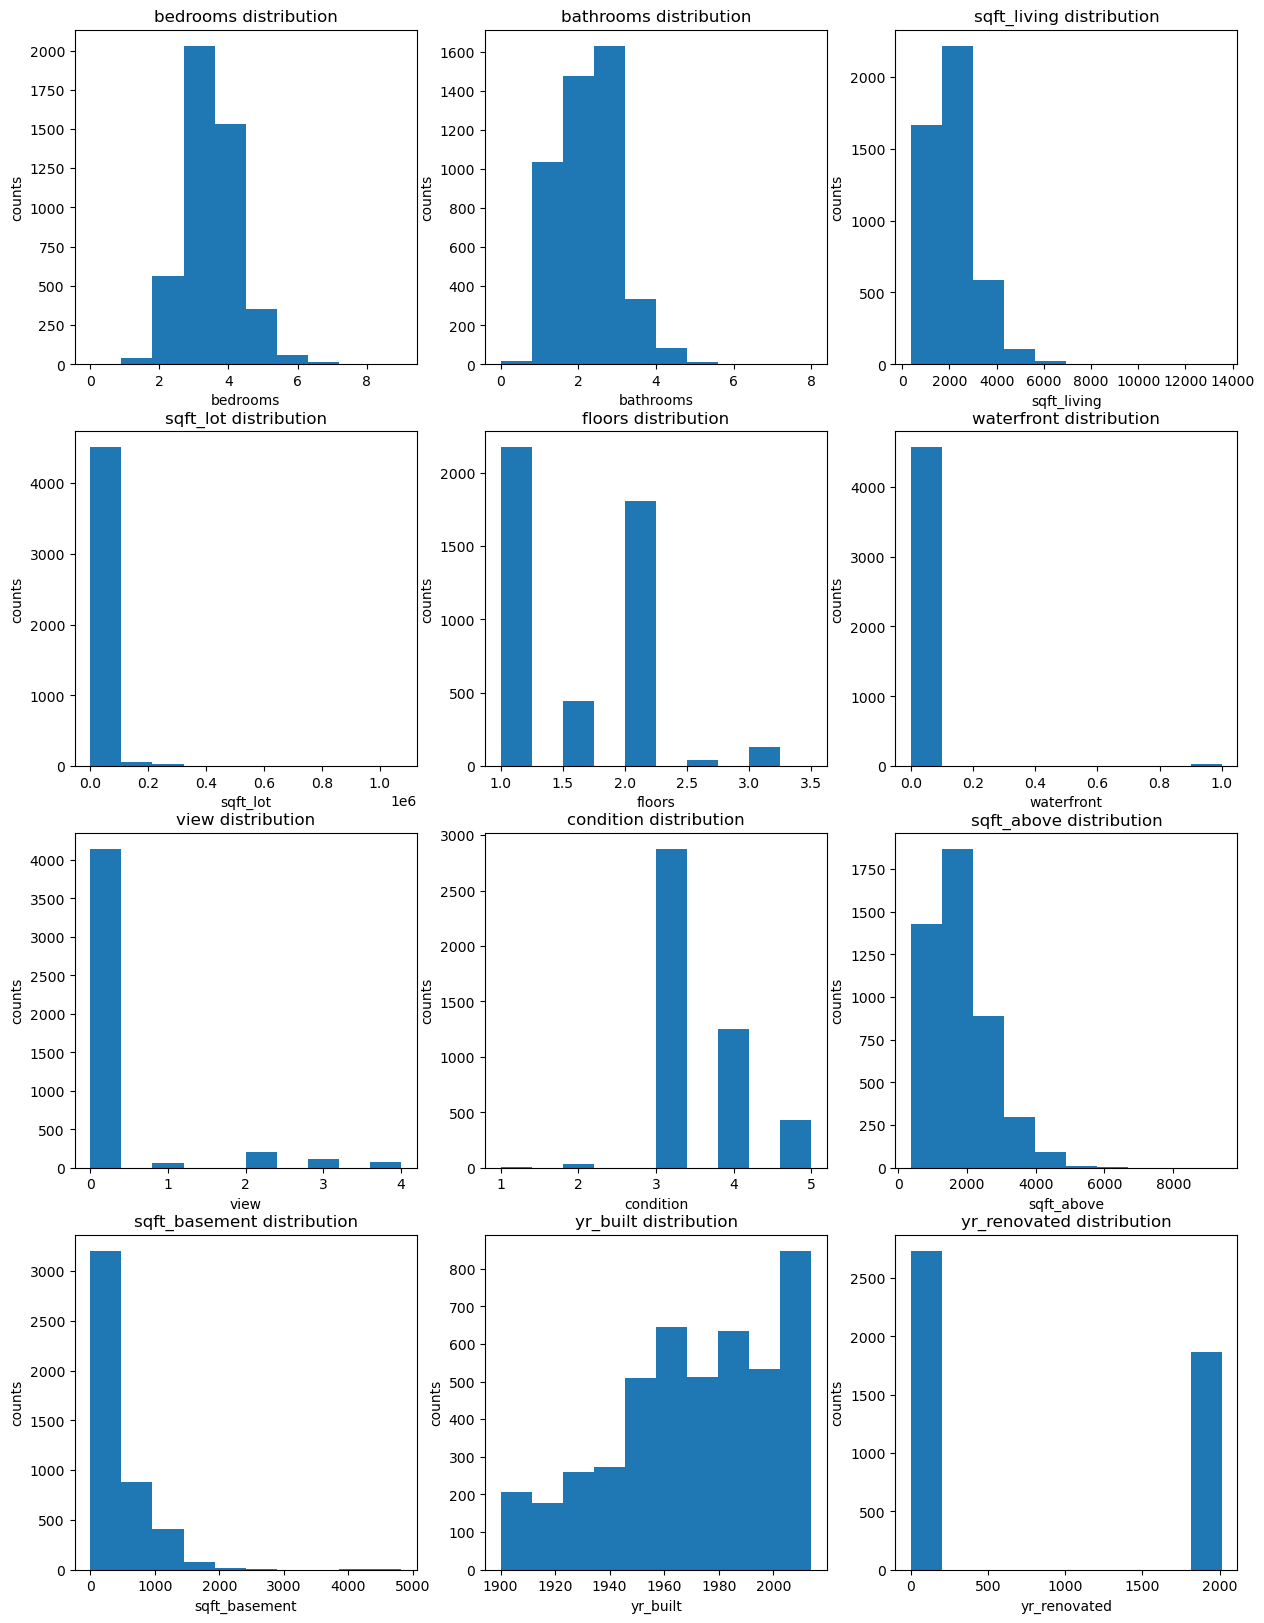

In [16]:
fig, axs = plt.subplots(4,3, figsize=(15,20))

for i in range(0,4):
    for j in range(0,3):
        axs[i,j].hist(df[continous_features_array[i][j]])
        axs[i,j].set_xlabel(continous_features_array[i][j])
        axs[i,j].set_ylabel("counts")
        axs[i,j].set_title(continous_features_array[i][j] + " distribution")

In [17]:
df["waterfront"].value_counts()

0    4567
1      33
Name: waterfront, dtype: int64

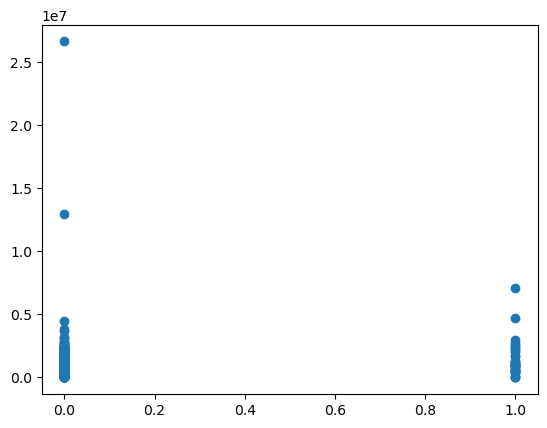

In [18]:
plt.scatter(df["waterfront"], df["price"])

waterfront almost does not affect the price, so we can drop it

In [19]:
df = df.drop("waterfront", axis=1)

In [20]:
df["floors"].value_counts()

1.0    2174
2.0    1811
1.5     444
3.0     128
2.5      41
3.5       2
Name: floors, dtype: int64

In [21]:
df["statezip"].value_counts()

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

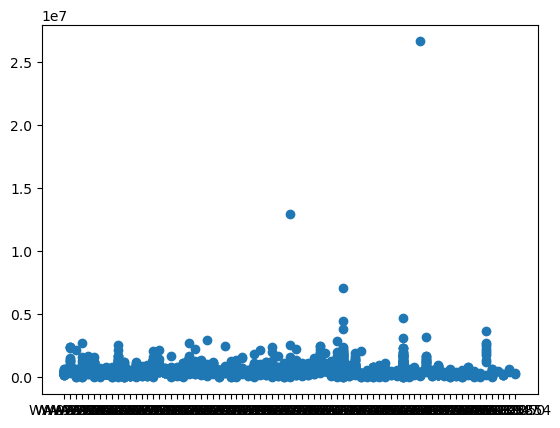

In [22]:
plt.scatter(df["statezip"],df["price"])

In [23]:
df["city"].value_counts()

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

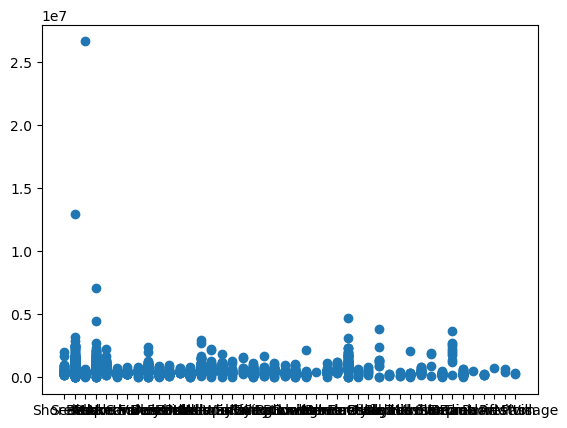

In [24]:
plt.scatter(df["city"],df["price"])

In [25]:
df.isna().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city             0
statezip         0
dtype: int64

# Clearing outliers in the target column

In [26]:
len(df[df["price"]==0])

49

In [27]:
df = df[df["price"]!=0]

2400000.0
995% percentile:  4530


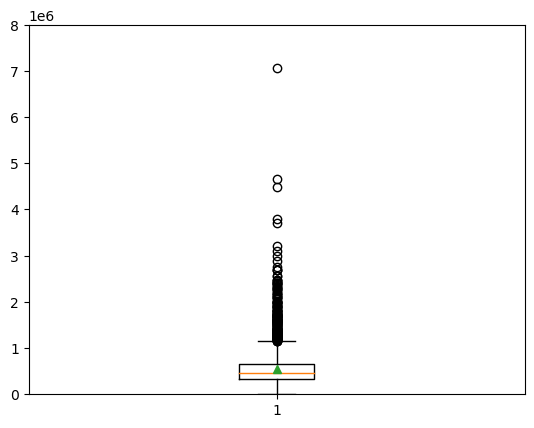

In [28]:
plt.boxplot(df["price"],showmeans=True)
plt.ylim(0, 8e6) 
quantile995 = df["price"].quantile(0.995)
print(quantile995)
num_values_in_995th_percentile = np.sum(df["price"] <= quantile995)
print("995% percentile: ", num_values_in_995th_percentile)

In [29]:
df2 = df.copy()
df2 = df2[df2["price"] <= quantile995]
df2.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,4,5,3370,280,1921,0,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,4,1930,0,1966,0,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,4,1000,1000,1963,0,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,4,1140,800,1976,1992,Redmond,WA 98052


In [30]:
print(df2.shape)

(4530, 14)


# Splitting the data

In [31]:
y = df2["price"]
x = df2.drop("price", axis=1)
x.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip
0,3.0,1.50,1340,7912,1.5,0,3,1340,0,1955,2005,Shoreline,WA 98133
1,5.0,2.50,3650,9050,2.0,4,5,3370,280,1921,0,Seattle,WA 98119
2,3.0,2.00,1930,11947,1.0,0,4,1930,0,1966,0,Kent,WA 98042
3,3.0,2.25,2000,8030,1.0,0,4,1000,1000,1963,0,Bellevue,WA 98008
4,4.0,2.50,1940,10500,1.0,0,4,1140,800,1976,1992,Redmond,WA 98052


In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Encoding and scaling

In [33]:
continous_features_used = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot", "floors", "view", "condition", "sqft_above", "sqft_basement", "yr_built", "yr_renovated"]
ct = ColumnTransformer(
                        [("categoricalEncoder", TargetEncoder(), categorical_features ),
                       ('scaler', StandardScaler(), continous_features_used)]
                       ,remainder="passthrough")


In [34]:
pipe = Pipeline([('columnTransform', ct),('model', LinearRegression())])

# Fine tuning the model parameters

In [38]:
import warnings
param_grid = [
    {"model":[LinearRegression()]},{"model":[ElasticNet()],"model__alpha":[0.001,0.1,1,10] ,"model__max_iter":[1000,2000,5000], "model__l1_ratio": np.arange(0,1.1,0.1)}]
grid = GridSearchCV(pipe, param_grid=param_grid,return_train_score=True)


with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    
    grid.fit(X_train, y_train)

In [39]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model,param_model__alpha,param_model__l1_ratio,param_model__max_iter,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.080828,0.007771,0.021825,0.005911,LinearRegression(),NaN,NaN,NaN,{'model': LinearRegression()},0.699958,...,0.720371,0.034166,40,0.733030,0.727170,0.734210,0.742458,0.722204,0.731814,0.006847
1,0.152250,0.016683,0.021445,0.006611,"ElasticNet(alpha=0.001, l1_ratio=0.0)",0.001,0.0,1000,"{'model': ElasticNet(alpha=0.001, l1_ratio=0.0...",0.700040,...,0.720374,0.034173,1,0.733029,0.727170,0.734210,0.742458,0.722204,0.731814,0.006847
2,0.230309,0.012680,0.016980,0.001316,"ElasticNet(alpha=0.001, l1_ratio=0.0)",0.001,0.0,2000,"{'model': ElasticNet(alpha=0.001, l1_ratio=0.0...",0.700045,...,0.720373,0.034174,5,0.733029,0.727169,0.734210,0.742458,0.722204,0.731814,0.006847
3,0.503277,0.029844,0.018318,0.009285,"ElasticNet(alpha=0.001, l1_ratio=0.0)",0.001,0.0,5000,"{'model': ElasticNet(alpha=0.001, l1_ratio=0.0...",0.700045,...,0.720373,0.034174,6,0.733029,0.727169,0.734210,0.742458,0.722204,0.731814,0.006847
4,0.154679,0.006786,0.022737,0.007843,"ElasticNet(alpha=0.001, l1_ratio=0.0)",0.001,0.1,1000,"{'model': ElasticNet(alpha=0.001, l1_ratio=0.0...",0.700031,...,0.720373,0.034173,2,0.733029,0.727170,0.734210,0.742458,0.722204,0.731814,0.006847
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,0.089529,0.004973,0.016895,0.001673,"ElasticNet(alpha=0.001, l1_ratio=0.0)",10,0.9,2000,"{'model': ElasticNet(alpha=0.001, l1_ratio=0.0...",0.687695,...,0.677432,0.038635,104,0.689192,0.684214,0.693768,0.700950,0.679638,0.689552,0.007411
129,0.090026,0.009237,0.023617,0.007880,"ElasticNet(alpha=0.001, l1_ratio=0.0)",10,0.9,5000,"{'model': ElasticNet(alpha=0.001, l1_ratio=0.0...",0.687695,...,0.677432,0.038635,104,0.689192,0.684214,0.693768,0.700950,0.679638,0.689552,0.007411
130,0.158206,0.006556,0.020078,0.006705,"ElasticNet(alpha=0.001, l1_ratio=0.0)",10,1.0,1000,"{'model': ElasticNet(alpha=0.001, l1_ratio=0.0...",0.699968,...,0.720371,0.034169,42,0.733029,0.727170,0.734210,0.742458,0.722204,0.731814,0.006847
131,0.251613,0.011966,0.018123,0.004266,"ElasticNet(alpha=0.001, l1_ratio=0.0)",10,1.0,2000,"{'model': ElasticNet(alpha=0.001, l1_ratio=0.0...",0.699968,...,0.720371,0.034169,41,0.733029,0.727170,0.734210,0.742458,0.722204,0.731814,0.006847


In [40]:
grid.cv_results_["mean_train_score"]

array([0.73181426, 0.73181405, 0.73181401, 0.73181401, 0.73181409,
       0.73181406, 0.73181405, 0.73181413, 0.73181411, 0.7318141 ,
       0.73181417, 0.73181414, 0.73181413, 0.73181419, 0.73181418,
       0.73181417, 0.73181421, 0.7318142 , 0.7318142 , 0.73181423,
       0.73181423, 0.73181422, 0.73181424, 0.73181424, 0.73181424,
       0.73181425, 0.73181425, 0.73181425, 0.73181426, 0.73181426,
       0.73181426, 0.73181426, 0.73181426, 0.73181426, 0.7300113 ,
       0.7300113 , 0.7300113 , 0.73030983, 0.73030983, 0.73030983,
       0.73058888, 0.73058888, 0.73058888, 0.73084642, 0.73084642,
       0.73084642, 0.73108016, 0.73108016, 0.73108016, 0.73128753,
       0.73128753, 0.73128753, 0.73146566, 0.73146566, 0.73146566,
       0.7316113 , 0.7316113 , 0.7316113 , 0.73172081, 0.73172081,
       0.73172081, 0.73179003, 0.73179003, 0.73179003, 0.73181426,
       0.73181426, 0.73181426, 0.68956461, 0.68956461, 0.68956461,
       0.69389899, 0.69389899, 0.69389899, 0.69835037, 0.69835

In [41]:
print("Train score: ", grid.score(X_train, y_train))
print("Test score: ", grid.score(X_test,y_test))

Train score:  0.7348634442491101
Test score:  0.7363093728840101


In [42]:
grid.best_params_

{'model': ElasticNet(alpha=0.001, l1_ratio=0.0),
 'model__alpha': 0.001,
 'model__l1_ratio': 0.0,
 'model__max_iter': 1000}

# Final model

In [43]:
pipe_final_model = Pipeline([('columnTransform', ct), ('model', ElasticNet(alpha=0.001, l1_ratio=0.0,max_iter=1000))])
pipe_final_model.fit(X_train,y_train)
print("Train score: ", pipe_final_model.score(X_train, y_train))
print("Test score: ", pipe_final_model.score(X_test,y_test))

Train score:  0.7348634442491101
Test score:  0.7363093728840101


C:\Users\lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.961e+13, tolerance: 3.739e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [44]:
print("actual: ",y_test.iloc[4])
print("pred: ", pipe_final_model.predict(X_test.iloc[[4]]))

actual:  545000.0
pred:  [606156.71836484]


All possible models almost give the same accuracy between 0.69 to 0.73